In [1]:
###Import tools
%matplotlib notebook
import matplotlib.pyplot as plt
import shapefile as shp
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import json
import mplcursors
import geopandas
import requests
from scipy.stats import pearsonr
from numpy import cov
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
from collections import Counter


In [2]:
###URL for GET requests to retrieve vehicle data
url="https://data.cityofchicago.org/resource/gumc-mgzr.json"

###Print the response object to the console
print(requests.get(url))

<Response [200]>


In [3]:
###Pretty print JSON for all launchpads
response = requests.get(url).json()

###Store response data in "online_data"
online_data = response
###Use json.dumps to print the json
print(json.dumps(online_data, indent=4, 
                 sort_keys=True))

[
    {
        ":@computed_region_43wa_7qmu": "32",
        ":@computed_region_d3ds_rm58": "228",
        ":@computed_region_d9mm_jgwp": "20",
        ":@computed_region_rpca_8um6": "59",
        ":@computed_region_vrxf_vc4k": "40",
        "age": "20-29",
        "area": "2",
        "beat": "0623",
        "block": "0 W 79TH ST",
        "case_number": "JF291644",
        "community_area": "CHATHAM",
        "date": "2022-06-23T21:35:00.000",
        "day_of_week": "5",
        "district": "6",
        "gunshot_injury_i": "YES",
        "hour": "21",
        "incident_fbi_cd": "01A",
        "incident_fbi_descr": "HOMICIDE - 1ST OR 2ND DEGREE (INDEX)",
        "incident_iucr_cd": "0110",
        "incident_iucr_secondary": "FIRST DEGREE MURDER",
        "incident_primary": "HOMICIDE",
        "latitude": "41.750336904",
        "location": {
            "coordinates": [
                -87.624910941301,
                41.750336904142
            ],
            "type": "Point"
      

In [4]:
###Print to see if you can access the dict.
print(online_data[0]['community_area'])

CHATHAM


In [5]:
###Read in the json data as a pandas data frame
chicago_crime_df = pd.read_json(url)
chicago_crime_df.rename(columns={'gunshot_injury_i':'gunshot_injury'},
                        inplace=True)
chicago_crime_df.head(50)

,case_number,date,block,victimization_primary,incident_primary,gunshot_injury,unique_id,zip_code,ward,community_area,...,longitude,location,:@computed_region_d3ds_rm58,:@computed_region_vrxf_vc4k,:@computed_region_rpca_8um6,:@computed_region_43wa_7qmu,:@computed_region_d9mm_jgwp,homicide_victim_first_name,homicide_victim_last_name,homicide_victim_mi
0,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#4,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,NaN,NaN,NaN
1,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#2,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,NaN,NaN,NaN
2,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#3,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,NaN,NaN,NaN
3,JF291644,2022-06-23 21:35:00,0 W 79TH ST,HOMICIDE,HOMICIDE,YES,HOM-JF291644-#1,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,NaN,NaN,NaN
4,JF291662,2022-06-23 21:31:00,700 E 105TH PL,BATTERY,BATTERY,YES,SHOOT-JF291662-#1,60628,9,PULLMAN,...,-87.604725,"{'type': 'Point', 'coordinates': [-87.60472465...",256.0,47.0,19.0,43.0,10.0,NaN,NaN,NaN
5,JF291585,2022-06-23 20:26:00,1800 W 46TH ST,BATTERY,BATTERY,YES,SHOOT-JF291585-#1,60609,15,NEW CITY,...,-87.670980,"{'type': 'Point', 'coordinates': [-87.67098, 4...",108.0,59.0,37.0,3.0,23.0,NaN,NaN,NaN
6,JF291592,2022-06-23 20:11:00,1900 S DRAKE AVE,BATTERY,BATTERY,YES,SHOOT-JF291592-#1,60623,24,NORTH LAWNDALE,...,-87.713115,"{'type': 'Point', 'coordinates': [-87.71311465...",130.0,30.0,57.0,14.0,21.0,NaN,NaN,NaN
7,JF291536,2022-06-23 19:42:00,2100 W 65TH ST,HOMICIDE,HOMICIDE,YES,HOM-JF291536-#1,60636,16,WEST ENGLEWOOD,...,-87.677371,"{'type': 'Point', 'coordinates': [-87.67737063...",205.0,65.0,23.0,2.0,17.0,NaN,NaN,NaN
8,JF291387,2022-06-23 17:44:00,1700 W 68TH ST,NON-FATAL,NON-FATAL,YES,SHOOT-JF291387-#1,60636,17,WEST ENGLEWOOD,...,-87.668185,"{'type': 'Point', 'coordinates': [-87.66818534...",204.0,65.0,23.0,31.0,17.0,NaN,NaN,NaN
9,JF291386,2022-06-23 17:33:00,6600 S EVANS AVE,BATTERY,BATTERY,YES,SHOOT-JF291386-#1,60637,20,WOODLAWN,...,-87.607479,"{'type': 'Point', 'coordinates': [-87.60747905...",206.0,9.0,60.0,4.0,18.0,NaN,NaN,NaN


In [6]:
chicago_crime_df = chicago_crime_df.replace('-', np.nan)
chicago_crime_df = chicago_crime_df.fillna(0)
chicago_crime_df.head(50)

,case_number,date,block,victimization_primary,incident_primary,gunshot_injury,unique_id,zip_code,ward,community_area,...,longitude,location,:@computed_region_d3ds_rm58,:@computed_region_vrxf_vc4k,:@computed_region_rpca_8um6,:@computed_region_43wa_7qmu,:@computed_region_d9mm_jgwp,homicide_victim_first_name,homicide_victim_last_name,homicide_victim_mi
0,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#4,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
1,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#2,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
2,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#3,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
3,JF291644,2022-06-23 21:35:00,0 W 79TH ST,HOMICIDE,HOMICIDE,YES,HOM-JF291644-#1,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
4,JF291662,2022-06-23 21:31:00,700 E 105TH PL,BATTERY,BATTERY,YES,SHOOT-JF291662-#1,60628,9,PULLMAN,...,-87.604725,"{'type': 'Point', 'coordinates': [-87.60472465...",256.0,47.0,19.0,43.0,10.0,0,0,0
5,JF291585,2022-06-23 20:26:00,1800 W 46TH ST,BATTERY,BATTERY,YES,SHOOT-JF291585-#1,60609,15,NEW CITY,...,-87.670980,"{'type': 'Point', 'coordinates': [-87.67098, 4...",108.0,59.0,37.0,3.0,23.0,0,0,0
6,JF291592,2022-06-23 20:11:00,1900 S DRAKE AVE,BATTERY,BATTERY,YES,SHOOT-JF291592-#1,60623,24,NORTH LAWNDALE,...,-87.713115,"{'type': 'Point', 'coordinates': [-87.71311465...",130.0,30.0,57.0,14.0,21.0,0,0,0
7,JF291536,2022-06-23 19:42:00,2100 W 65TH ST,HOMICIDE,HOMICIDE,YES,HOM-JF291536-#1,60636,16,WEST ENGLEWOOD,...,-87.677371,"{'type': 'Point', 'coordinates': [-87.67737063...",205.0,65.0,23.0,2.0,17.0,0,0,0
8,JF291387,2022-06-23 17:44:00,1700 W 68TH ST,NON-FATAL,NON-FATAL,YES,SHOOT-JF291387-#1,60636,17,WEST ENGLEWOOD,...,-87.668185,"{'type': 'Point', 'coordinates': [-87.66818534...",204.0,65.0,23.0,31.0,17.0,0,0,0
9,JF291386,2022-06-23 17:33:00,6600 S EVANS AVE,BATTERY,BATTERY,YES,SHOOT-JF291386-#1,60637,20,WOODLAWN,...,-87.607479,"{'type': 'Point', 'coordinates': [-87.60747905...",206.0,9.0,60.0,4.0,18.0,0,0,0


In [7]:
ln=lambda x: str(x).split(',')
chicago_crime_df['case_number'].apply(ln)
chicago_crime_df['zip_code'] = chicago_crime_df['zip_code'].astype(float).astype(int)
chicago_crime_df['ward'] = chicago_crime_df['ward'].astype(float).astype(int)
print(chicago_crime_df.info())
chicago_crime_df.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   case_number                   1000 non-null   object        
 1   date                          1000 non-null   datetime64[ns]
 2   block                         1000 non-null   object        
 3   victimization_primary         1000 non-null   object        
 4   incident_primary              1000 non-null   object        
 5   gunshot_injury                1000 non-null   object        
 6   unique_id                     1000 non-null   object        
 7   zip_code                      1000 non-null   int32         
 8   ward                          1000 non-null   int32         
 9   community_area                1000 non-null   object        
 10  street_outreach_organization  1000 non-null   object        
 11  area                          1

,case_number,date,block,victimization_primary,incident_primary,gunshot_injury,unique_id,zip_code,ward,community_area,...,longitude,location,:@computed_region_d3ds_rm58,:@computed_region_vrxf_vc4k,:@computed_region_rpca_8um6,:@computed_region_43wa_7qmu,:@computed_region_d9mm_jgwp,homicide_victim_first_name,homicide_victim_last_name,homicide_victim_mi
0,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#4,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
1,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#2,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
2,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#3,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
3,JF291644,2022-06-23 21:35:00,0 W 79TH ST,HOMICIDE,HOMICIDE,YES,HOM-JF291644-#1,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
4,JF291662,2022-06-23 21:31:00,700 E 105TH PL,BATTERY,BATTERY,YES,SHOOT-JF291662-#1,60628,9,PULLMAN,...,-87.604725,"{'type': 'Point', 'coordinates': [-87.60472465...",256.0,47.0,19.0,43.0,10.0,0,0,0
5,JF291585,2022-06-23 20:26:00,1800 W 46TH ST,BATTERY,BATTERY,YES,SHOOT-JF291585-#1,60609,15,NEW CITY,...,-87.670980,"{'type': 'Point', 'coordinates': [-87.67098, 4...",108.0,59.0,37.0,3.0,23.0,0,0,0
6,JF291592,2022-06-23 20:11:00,1900 S DRAKE AVE,BATTERY,BATTERY,YES,SHOOT-JF291592-#1,60623,24,NORTH LAWNDALE,...,-87.713115,"{'type': 'Point', 'coordinates': [-87.71311465...",130.0,30.0,57.0,14.0,21.0,0,0,0
7,JF291536,2022-06-23 19:42:00,2100 W 65TH ST,HOMICIDE,HOMICIDE,YES,HOM-JF291536-#1,60636,16,WEST ENGLEWOOD,...,-87.677371,"{'type': 'Point', 'coordinates': [-87.67737063...",205.0,65.0,23.0,2.0,17.0,0,0,0
8,JF291387,2022-06-23 17:44:00,1700 W 68TH ST,NON-FATAL,NON-FATAL,YES,SHOOT-JF291387-#1,60636,17,WEST ENGLEWOOD,...,-87.668185,"{'type': 'Point', 'coordinates': [-87.66818534...",204.0,65.0,23.0,31.0,17.0,0,0,0
9,JF291386,2022-06-23 17:33:00,6600 S EVANS AVE,BATTERY,BATTERY,YES,SHOOT-JF291386-#1,60637,20,WOODLAWN,...,-87.607479,"{'type': 'Point', 'coordinates': [-87.60747905...",206.0,9.0,60.0,4.0,18.0,0,0,0


In [8]:
###Filter data to include only incidents in the year 2022
incidents_FY22 = chicago_crime_df[
                       (chicago_crime_df['date'] >= '01/01/2022') &
                       (chicago_crime_df['date'] < '12/31/2022')]
incidents_FY22

,case_number,date,block,victimization_primary,incident_primary,gunshot_injury,unique_id,zip_code,ward,community_area,...,longitude,location,:@computed_region_d3ds_rm58,:@computed_region_vrxf_vc4k,:@computed_region_rpca_8um6,:@computed_region_43wa_7qmu,:@computed_region_d9mm_jgwp,homicide_victim_first_name,homicide_victim_last_name,homicide_victim_mi
0,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#4,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
1,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#2,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
2,JF291644,2022-06-23 21:35:00,0 W 79TH ST,BATTERY,HOMICIDE,YES,SHOOT-JF291644-#3,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
3,JF291644,2022-06-23 21:35:00,0 W 79TH ST,HOMICIDE,HOMICIDE,YES,HOM-JF291644-#1,60620,6,CHATHAM,...,-87.624911,"{'type': 'Point', 'coordinates': [-87.62491094...",228.0,40.0,59.0,32.0,20.0,0,0,0
4,JF291662,2022-06-23 21:31:00,700 E 105TH PL,BATTERY,BATTERY,YES,SHOOT-JF291662-#1,60628,9,PULLMAN,...,-87.604725,"{'type': 'Point', 'coordinates': [-87.60472465...",256.0,47.0,19.0,43.0,10.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,JF175271,2022-03-15 22:22:00,200 E 78TH ST,HOMICIDE,HOMICIDE,YES,HOM-JF175271-#1,60619,6,GREATER GRAND CROSSING,...,-87.619201,"{'type': 'Point', 'coordinates': [-87.61920094...",228.0,67.0,61.0,32.0,20.0,ROGER,LEWIS,E
996,JF175302,2022-03-15 21:15:00,7400 S RACINE AVE,BATTERY,BATTERY,YES,SHOOT-JF175302-#1,60636,17,WEST ENGLEWOOD,...,-87.653685,"{'type': 'Point', 'coordinates': [-87.65368465...",215.0,66.0,11.0,31.0,17.0,0,0,0
997,JF175178,2022-03-15 20:00:00,7500 N OAKLEY AVE,BATTERY,BATTERY,YES,SHOOT-JF175178-#1,60645,49,WEST RIDGE,...,-87.688025,"{'type': 'Point', 'coordinates': [-87.68802534...",35.0,20.0,12.0,5.0,11.0,0,0,0
998,JF174005,2022-03-14 19:56:00,6500 S MARSHFIELD AVE,BATTERY,BATTERY,YES,SHOOT-JF174005-#1,60636,15,WEST ENGLEWOOD,...,-87.665490,"{'type': 'Point', 'coordinates': [-87.66549, 4...",204.0,65.0,23.0,3.0,17.0,0,0,0


In [9]:
###Quick Central Tendency Stats
chicago_crime_df.describe()

,zip_code,ward,area,district,beat,month,day_of_week,hour,state_house_district,state_senate_district,latitude,longitude,:@computed_region_d3ds_rm58,:@computed_region_vrxf_vc4k,:@computed_region_rpca_8um6,:@computed_region_43wa_7qmu,:@computed_region_d9mm_jgwp
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,60630.12000,20.202000,2.536000,9.403000,963.557000,4.765000,3.896000,13.184000,18.473000,9.443000,41.818345,-87.666307,164.623000,40.604000,32.663000,24.279000,16.595000
std,21.90903,11.445007,1.370614,5.814671,582.072118,1.002387,2.108941,7.843702,13.329627,6.663419,0.075433,0.055863,71.077358,19.786174,18.531185,14.664317,5.449833
min,60601.00000,1.000000,1.000000,1.000000,111.000000,3.000000,1.000000,0.000000,0.000000,0.000000,41.653444,-87.805990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60619.00000,9.000000,1.000000,5.000000,524.000000,4.000000,2.000000,5.000000,8.000000,4.000000,41.759181,-87.715229,107.750000,26.000000,19.000000,11.000000,14.000000
50%,60624.00000,21.000000,2.000000,8.000000,834.500000,5.000000,4.000000,15.000000,13.000000,7.000000,41.808928,-87.664047,163.000000,39.000000,30.000000,23.000000,17.000000
75%,60639.25000,28.000000,4.000000,11.000000,1132.000000,6.000000,6.000000,20.000000,28.000000,14.000000,41.879053,-87.626150,225.250000,61.000000,56.000000,35.250000,21.000000
max,60827.00000,50.000000,5.000000,25.000000,2535.000000,6.000000,7.000000,23.000000,78.000000,39.000000,42.022293,-87.537995,277.000000,76.000000,61.000000,50.000000,25.000000


In [10]:
###Total number of incidents in year 2022 by community 
incidents_community_groups_FY22 = incidents_FY22.groupby(['community_area'])

In [11]:
incidents_community_groups_FY22.groups

{'ALBANY PARK': [350, 443, 558, 582, 615, 623, 624, 640, 711, 712, 774, 879], 'ARCHER HEIGHTS': [58, 734, 744, 748, 798, 972], 'ARMOUR SQUARE': [227, 458, 550, 551], 'ASHBURN': [65, 66, 200, 490, 544], 'AUBURN GRESHAM': [49, 50, 51, 52, 56, 110, 115, 120, 133, 134, 143, 160, 161, 162, 163, 164, 178, 179, 243, 291, 296, 376, 385, 404, 481, 488, 489, 494, 499, 563, 568, 578, 627, 702, 738, 768, 784, 823, 835, 836, 851, 865, 903, 904, 925, 963], 'AUSTIN': [13, 42, 61, 98, 119, 124, 130, 251, 253, 262, 263, 274, 282, 331, 332, 333, 334, 335, 336, 339, 354, 386, 387, 388, 402, 424, 425, 428, 432, 467, 547, 559, 576, 635, 664, 667, 668, 715, 718, 728, 741, 742, 750, 773, 786, 814, 822, 853, 854, 855, 856, 861, 898, 899, 928, 947, 962], 'AVALON PARK': [93, 156, 764, 986], 'AVONDALE': [430, 431, 484, 880], 'BELMONT CRAGIN': [188, 189, 429, 548, 549, 655, 716, 755, 870, 871, 905, 957, 966, 994], 'BRIDGEPORT': [100, 577, 683, 684, 794], 'BRIGHTON PARK': [87, 239, 286, 486, 523, 581, 634, 661, 73

In [12]:
###Aggregate or 'add up' the number of victims for each gender category
incidents_community_groups_FY22['gunshot_injury'].agg('count')

community_area
ALBANY PARK       12
ARCHER HEIGHTS     6
ARMOUR SQUARE      4
ASHBURN            5
AUBURN GRESHAM    46
                  ..
WEST LAWN          9
WEST PULLMAN      26
WEST RIDGE         2
WEST TOWN         11
WOODLAWN          19
Name: gunshot_injury, Length: 70, dtype: int64

In [13]:
###Place the aggregated race groups object into a pandas dataframe
incidents_community_groups_FY22_totals = pd.DataFrame(incidents_community_groups_FY22['gunshot_injury'].agg('count'))
incidents_community_groups_FY22_totals.sort_values(ascending=False,by='gunshot_injury',inplace=True)
incidents_community_groups_FY22_totals

,gunshot_injury
community_area,
WEST ENGLEWOOD,60
AUSTIN,57
HUMBOLDT PARK,56
SOUTH SHORE,51
WEST GARFIELD PARK,50
...,...
EAST SIDE,1
MONTCLARE,1
MCKINLEY PARK,1


In [14]:
###Top 5 community groups
incidents_community_groups_FY22_totals.head(5)

,gunshot_injury
community_area,
WEST ENGLEWOOD,60
AUSTIN,57
HUMBOLDT PARK,56
SOUTH SHORE,51
WEST GARFIELD PARK,50


<IPython.core.display.Javascript object>


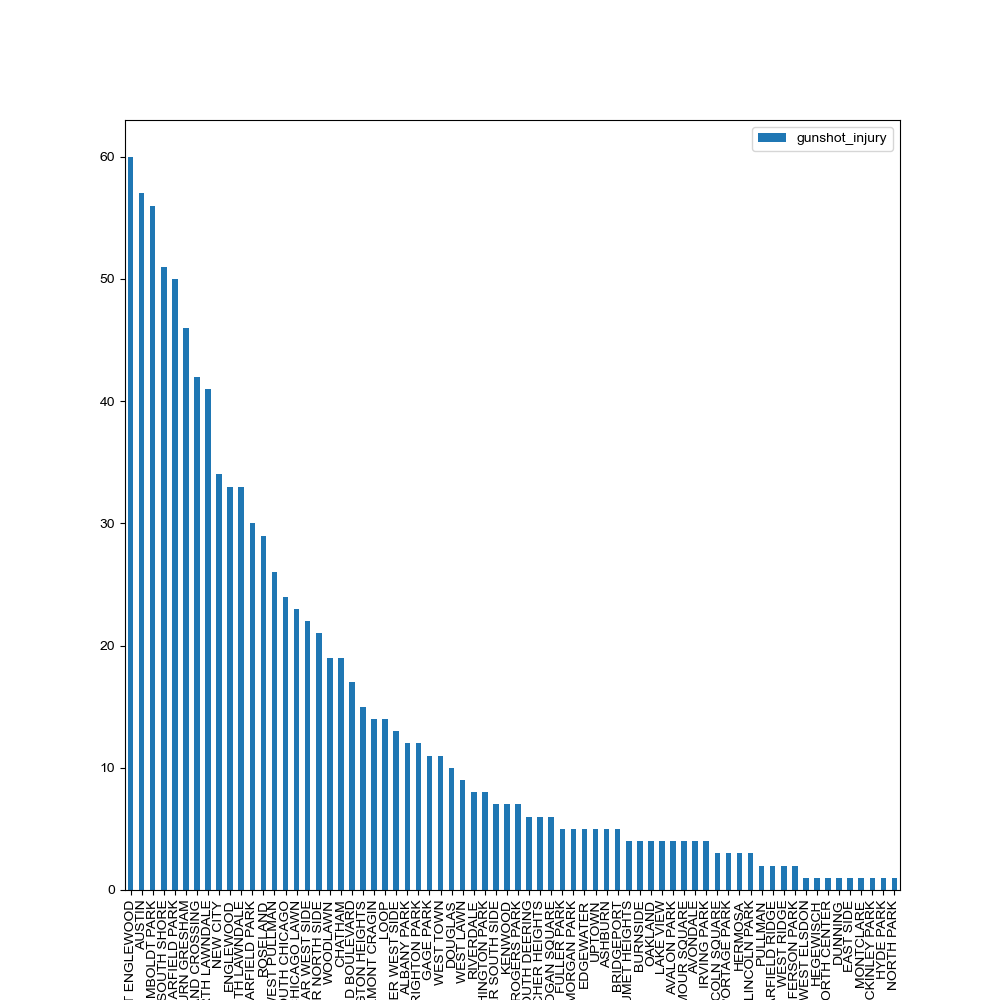

<AxesSubplot:xlabel='community_area'>

In [15]:
###Plot the gender_totals as a bar graph
incidents_community_groups_FY22_totals.plot(kind='bar', rot=90, figsize=(10,10))

In [16]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

#opening the vector map
shp_df = 'D:\Chicago_geofiles\Community Areas\geo_export_a9a6ab75-22e9-447d-9f4e-2d3425318016.shp'
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_df)

In [17]:
len(sf.shapes())
sf.records()

[Record #0: [0.0, '35', '35', 0.0, 0.0, 'DOUGLAS', 0.0, 46004621.1581, 31027.0545098],
 Record #1: [0.0, '36', '36', 0.0, 0.0, 'OAKLAND', 0.0, 16913961.0408, 19565.5061533],
 Record #2: [0.0, '37', '37', 0.0, 0.0, 'FULLER PARK', 0.0, 19916704.8692, 25339.0897503],
 Record #3: [0.0, '38', '38', 0.0, 0.0, 'GRAND BOULEVARD', 0.0, 48492503.1554, 28196.8371573],
 Record #4: [0.0, '39', '39', 0.0, 0.0, 'KENWOOD', 0.0, 29071741.9283, 23325.1679062],
 Record #5: [0.0, '4', '4', 0.0, 0.0, 'LINCOLN SQUARE', 0.0, 71352328.2399, 36624.6030848],
 Record #6: [0.0, '40', '40', 0.0, 0.0, 'WASHINGTON PARK', 0.0, 42373881.4842, 28175.3160866],
 Record #7: [0.0, '41', '41', 0.0, 0.0, 'HYDE PARK', 0.0, 45105380.1732, 29746.7082016],
 Record #8: [0.0, '42', '42', 0.0, 0.0, 'WOODLAWN', 0.0, 57815179.512, 46936.9592443],
 Record #9: [0.0, '1', '1', 0.0, 0.0, 'ROGERS PARK', 0.0, 51259902.4506, 34052.3975757],
 Record #10: [0.0, '11', '11', 0.0, 0.0, 'JEFFERSON PARK', 0.0, 64868161.6818, 44011.9571704],
 Recor

In [18]:
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
df.shape


(77, 10)

In [19]:
df.head(5)

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,coords
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"[(-87.60914087617894, 41.84469250265398), (-87..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"[(-87.59215283879394, 41.81692934626684), (-87..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"[(-87.62879823733725, 41.80189303368919), (-87..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"[(-87.6067081256125, 41.81681377057218), (-87...."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"[(-87.59215283879394, 41.81692934626684), (-87..."


In [20]:
def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

<IPython.core.display.Javascript object>


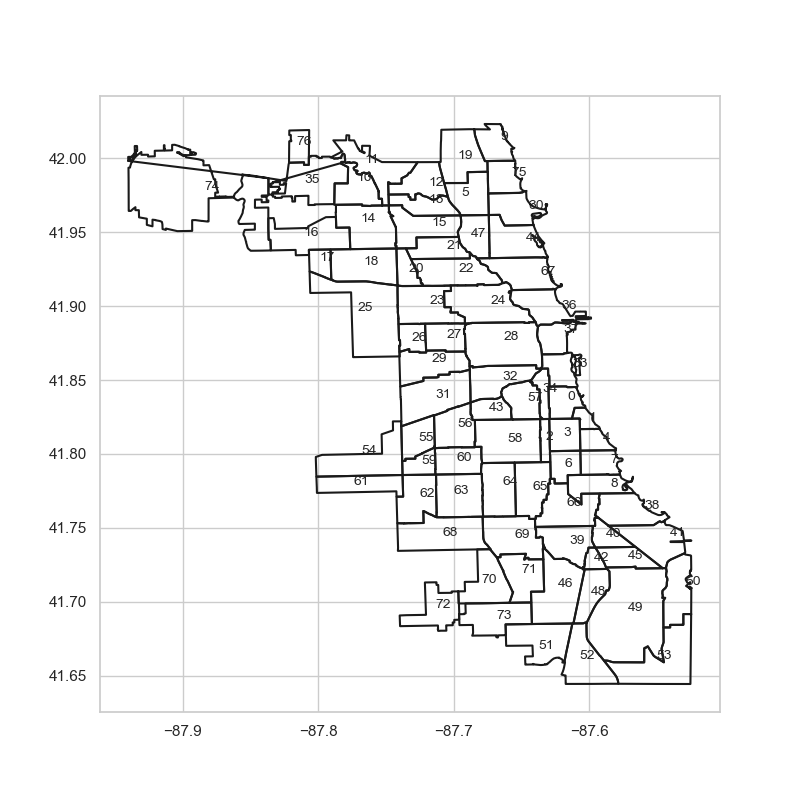

In [21]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (8,8)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map
plot_map(sf)

In [22]:
# set the filepath and load
fp = 'D:\\Chicago_geofiles\\Community Areas\\geo_export_a9a6ab75-22e9-447d-9f4e-2d3425318016.shp'
#reading the file stored in variable fp
map_df = geopandas.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [23]:
###Merge dataframes
merged_df = pd.merge(map_df, incidents_community_groups_FY22_totals, left_on='community', right_index=True)
merged_df

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,gunshot_injury
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",10
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",4
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",5
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",17
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",7
...,...,...,...,...,...,...,...,...,...,...,...
68,0.0,70,70,0.0,0.0,ASHBURN,0.0,1.354603e+08,54818.154632,"POLYGON ((-87.71255 41.75734, -87.71252 41.757...",5
69,0.0,71,71,0.0,0.0,AUBURN GRESHAM,0.0,1.050654e+08,46757.721716,"POLYGON ((-87.63990 41.75615, -87.63990 41.755...",46
71,0.0,73,73,0.0,0.0,WASHINGTON HEIGHTS,0.0,7.963575e+07,42222.598163,"POLYGON ((-87.63373 41.72885, -87.63369 41.726...",15
73,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685...",5


<IPython.core.display.Javascript object>


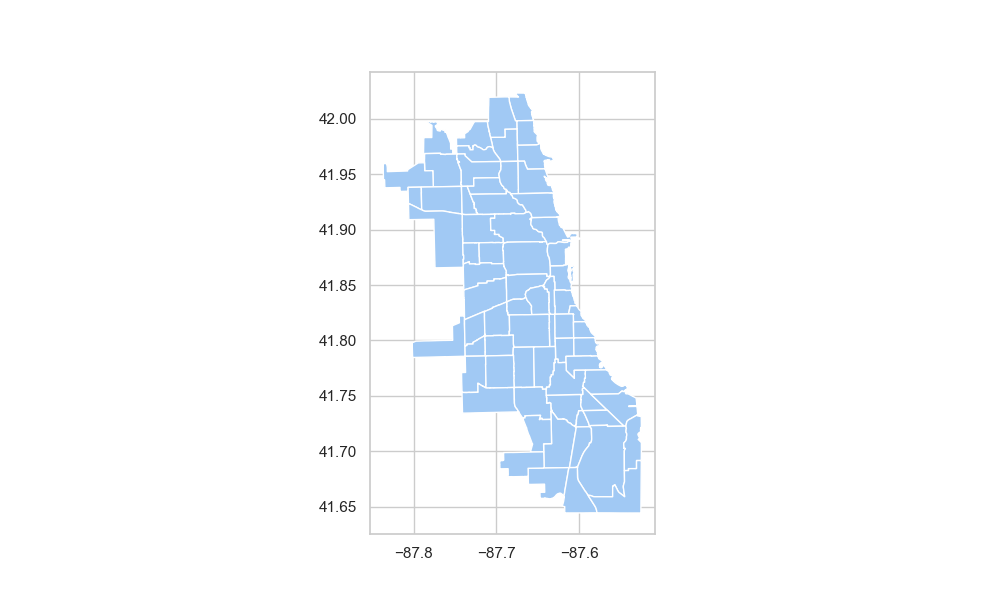

<AxesSubplot:>

In [24]:
merged_df.plot()

In [39]:
###Place the aggregated race groups object into a pandas dataframe
incidents_community_groups_FY22 = merged_df.groupby(['community'])
incidents_community_groups_FY22_totals = pd.DataFrame(incidents_community_groups_FY22['gunshot_injury'].agg('sum'))
incidents_community_groups_FY22_totals.sort_values(ascending=False,by='gunshot_injury',inplace=True)
incidents_community_groups_FY22_totals.head(10)

,gunshot_injury
community,
WEST ENGLEWOOD,60
AUSTIN,57
HUMBOLDT PARK,56
SOUTH SHORE,51
WEST GARFIELD PARK,50
AUBURN GRESHAM,46
GREATER GRAND CROSSING,42
NORTH LAWNDALE,41
NEW CITY,34


<IPython.core.display.Javascript object>


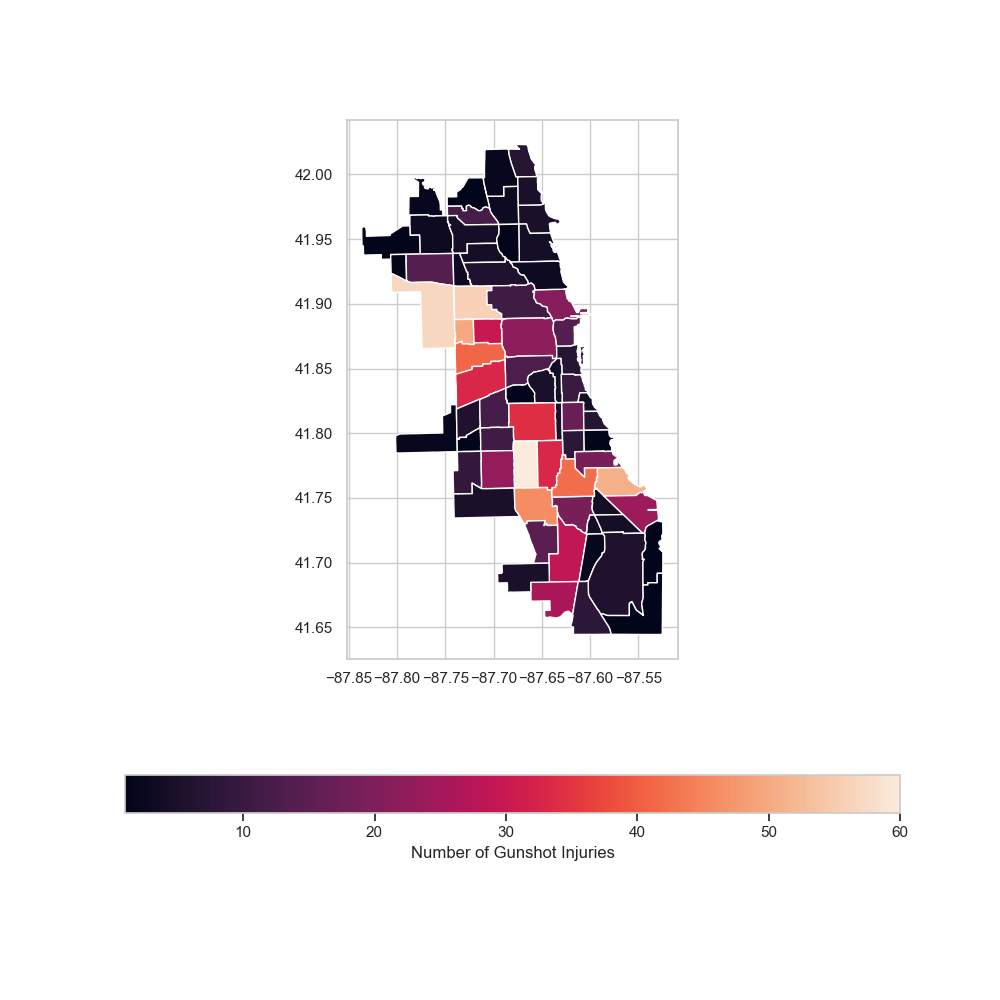

<AxesSubplot:>

In [38]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)

merged_df.plot(column='gunshot_injury',
               ax=ax,
               legend=True,
               legend_kwds={'label': "Number of Gunshot Injuries",
                            'orientation': "horizontal"})